In [7]:
%matplotlib inline
import copy
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from combining_data.combining_data import getCandidatesList, getCt, LunaDataset
candidates_list = getCandidatesList(reqOnDisk = True)

In [3]:
from utill.util import xyz2irc
candidates_list[0]

CandidateTuple(isNodule=True, diameter_mm=25.23320204, series_uid='1.3.6.1.4.1.14519.5.2.1.6279.6001.511347030803753100045216493273', center_xyz=(63.4740118048, 73.9174523314, -213.736128767))

In [4]:
from combining_data.visualization import findPositiveSamples, showCandidate
positiveSample_list = findPositiveSamples()

2022-05-09 13:30:48,450 INFO     pid:5940 combining_data.combining_data:287:__init__ <combining_data.combining_data.LunaDataset object at 0x0000026368A148E0>: 56938 training samples
2022-05-09 13:30:48,450 INFO     pid:5940 combining_data.combining_data:293:__init__ <combining_data.combining_data.LunaDataset object at 0x0000026368A148E0>: 56938 training samples, 56816 neg, 122 pos, unbalanced ratio


In [5]:
augmentation_dict = {}
augmentation_list = [
    ('None', {}),
    ('flip', {'flip': True}),
    ('offset', {'offset': 0.1}),
    ('scale', {'scale': 0.2}),
    ('rotate', {'rotate': True}),
    ('noise', {'noise': 25.0}),    
]
ds_list = [
    LunaDataset(sortby_str='label_and_size', augmen_dict=augmentation_dict) 
    for title_str, augmentation_dict in augmentation_list
]

all_dict = {}
for title_str, augmentation_dict in augmentation_list:
    all_dict.update(augmentation_dict)
all_ds = LunaDataset(sortby_str='label_and_size', augmen_dict=all_dict)

augmentation_list.extend([('All', augmentation_dict)] * 3)
ds_list.extend([all_ds] * 3)

2022-05-09 13:30:48,501 INFO     pid:5940 combining_data.combining_data:287:__init__ <combining_data.combining_data.LunaDataset object at 0x0000026301A53B80>: 56938 training samples
2022-05-09 13:30:48,502 INFO     pid:5940 combining_data.combining_data:293:__init__ <combining_data.combining_data.LunaDataset object at 0x0000026301A53B80>: 56938 training samples, 56816 neg, 122 pos, unbalanced ratio
2022-05-09 13:30:48,509 INFO     pid:5940 combining_data.combining_data:287:__init__ <combining_data.combining_data.LunaDataset object at 0x0000026368A14970>: 56938 training samples
2022-05-09 13:30:48,509 INFO     pid:5940 combining_data.combining_data:293:__init__ <combining_data.combining_data.LunaDataset object at 0x0000026368A14970>: 56938 training samples, 56816 neg, 122 pos, unbalanced ratio
2022-05-09 13:30:48,517 INFO     pid:5940 combining_data.combining_data:287:__init__ <combining_data.combining_data.LunaDataset object at 0x0000026368A18070>: 56938 training samples
2022-05-09 13:

torch.Size([1, 32, 48, 48]) (tensor([0, 1]), '1.3.6.1.4.1.14519.5.2.1.6279.6001.805925269324902055566754756843', tensor([ 46, 374, 170]))


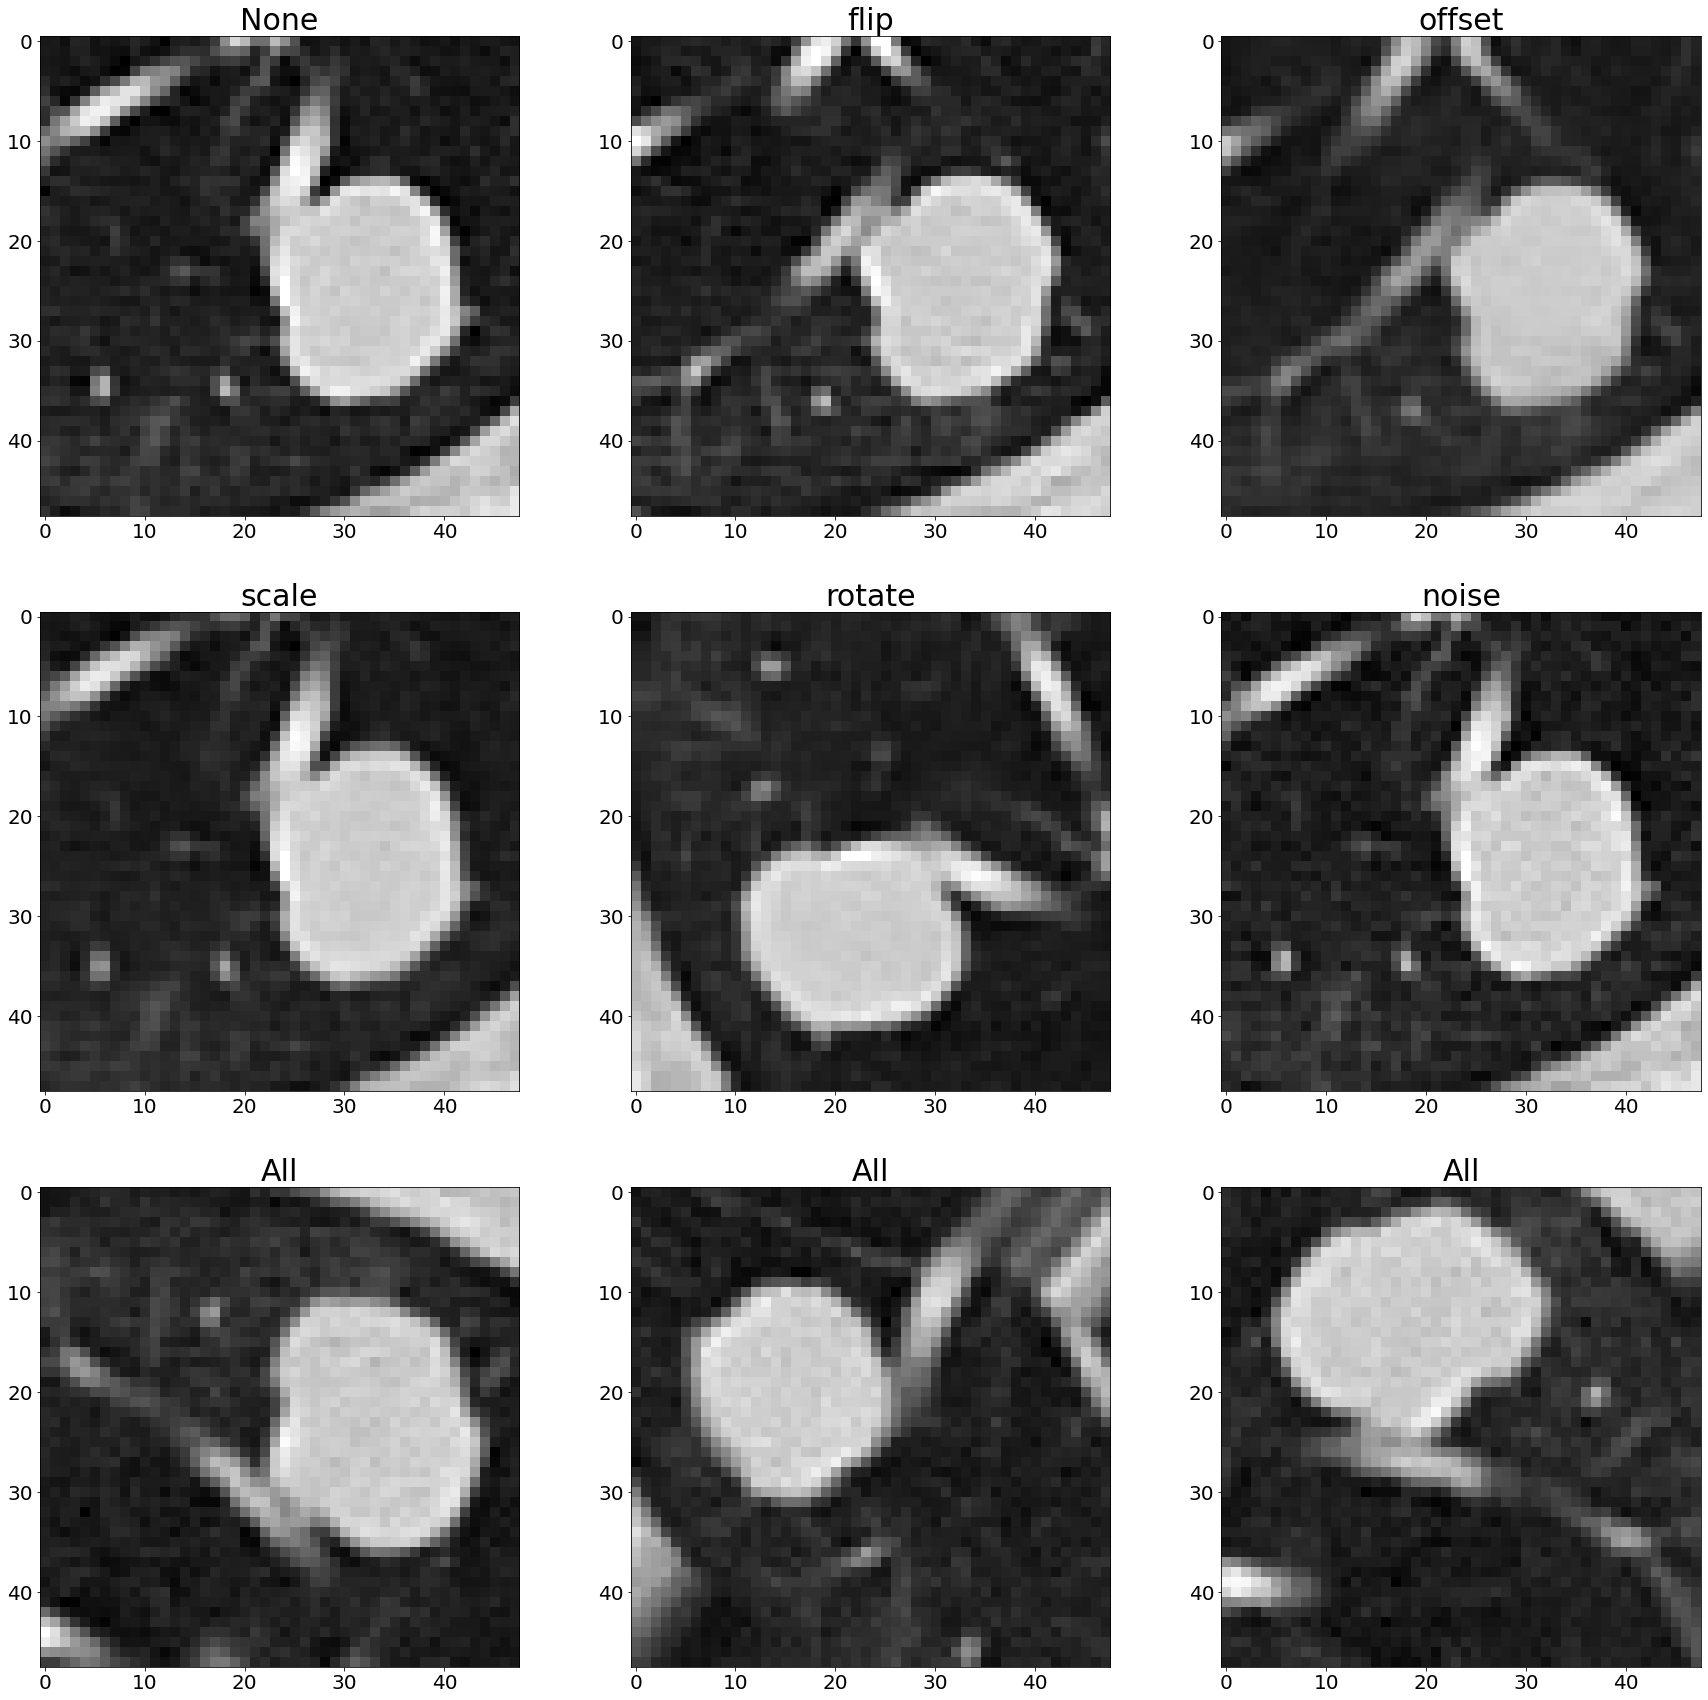

In [13]:
sample_ndx = 99
# sample_ndx = 154
# sample_ndx = 155

sample_tup = all_ds[sample_ndx]
print(sample_tup[0].shape, sample_tup[1:])

fig = plt.figure(figsize=(30, 30))

clim=(-1000.0, 300)

for i, ((title_str, _), ds) in enumerate(zip(augmentation_list, ds_list)):
    sample_tup = ds[sample_ndx]
    subplot = fig.add_subplot(3, 3, i+1)
    subplot.set_title(title_str, fontsize=30)
    for label in (subplot.get_xticklabels() + subplot.get_yticklabels()):
        label.set_fontsize(20)
    plt.imshow(sample_tup[0][0][16], clim=clim, cmap='gray')